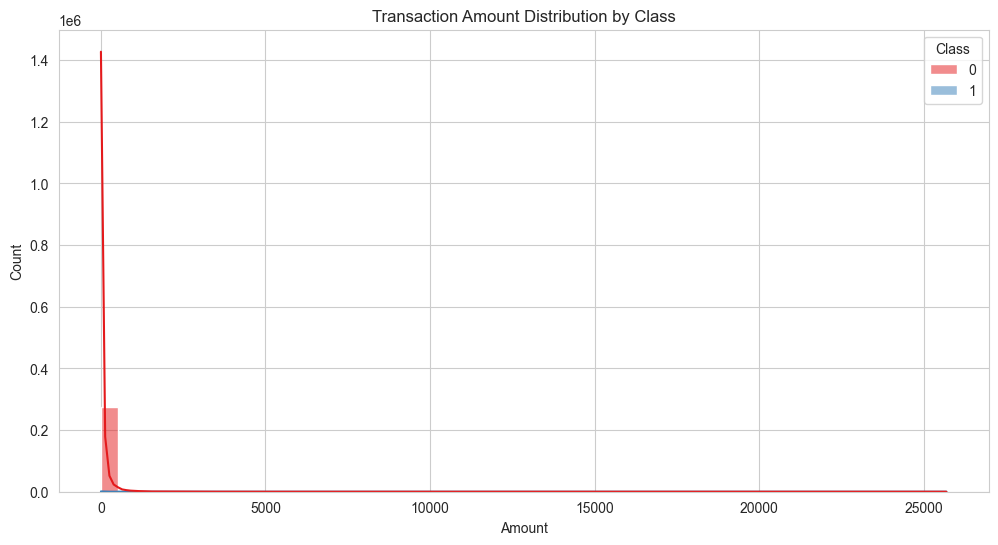

(492, 31)
(284315, 31)
Class
0    284315
1       492
Name: count, dtype: int64
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
        Time        V1        V2        V3  ...       V27       V28  Amount  Class
541    406.0 -2.312227  1.951992 -1.609851  ...  0.261145 -0.143276    0.00      1
623    472.0 -3.043541 -3.157307  1.088463  ... -0.252773  0.035764  529.00      1
4920  4462.0 -2.303350  1.759247 -0.359745  ...  0.039566 -0.153029  239.93      1
6108  6986.0 -4.397974  1.358367 -2.592844  ... -0.827136  0.849573   59.00      1
6329  7519.0  1.234235  3.019740 -4.304597  ... -0.010016  0.146793    1.00      1

[5 rows x 31

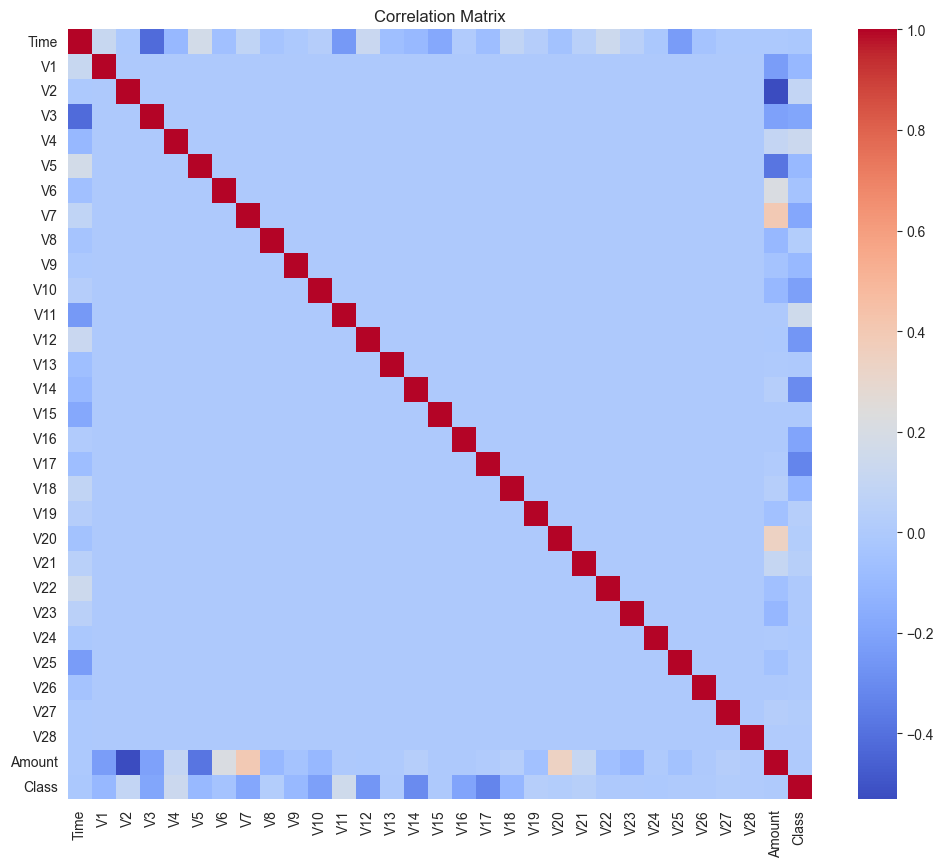

                Time             V1  ...         Amount     Class
count  284315.000000  284315.000000  ...  284315.000000  284315.0
mean    94838.202258       0.008258  ...      88.291022       0.0
std     47484.015786       1.929814  ...     250.105092       0.0
min         0.000000     -56.407510  ...       0.000000       0.0
25%     54230.000000      -0.917544  ...       5.650000       0.0
50%     84711.000000       0.020023  ...      22.000000       0.0
75%    139333.000000       1.316218  ...      77.050000       0.0
max    172792.000000       2.454930  ...   25691.160000       0.0

[8 rows x 31 columns]
                Time          V1          V2  ...         V28       Amount  Class
count     492.000000  492.000000  492.000000  ...  492.000000   492.000000  492.0
mean    80746.806911   -4.771948    3.623778  ...    0.075667   122.211321    1.0
std     47835.365138    6.783687    4.291216  ...    0.547291   256.683288    0.0
min       406.000000  -30.552380   -8.402154  ...   -1.

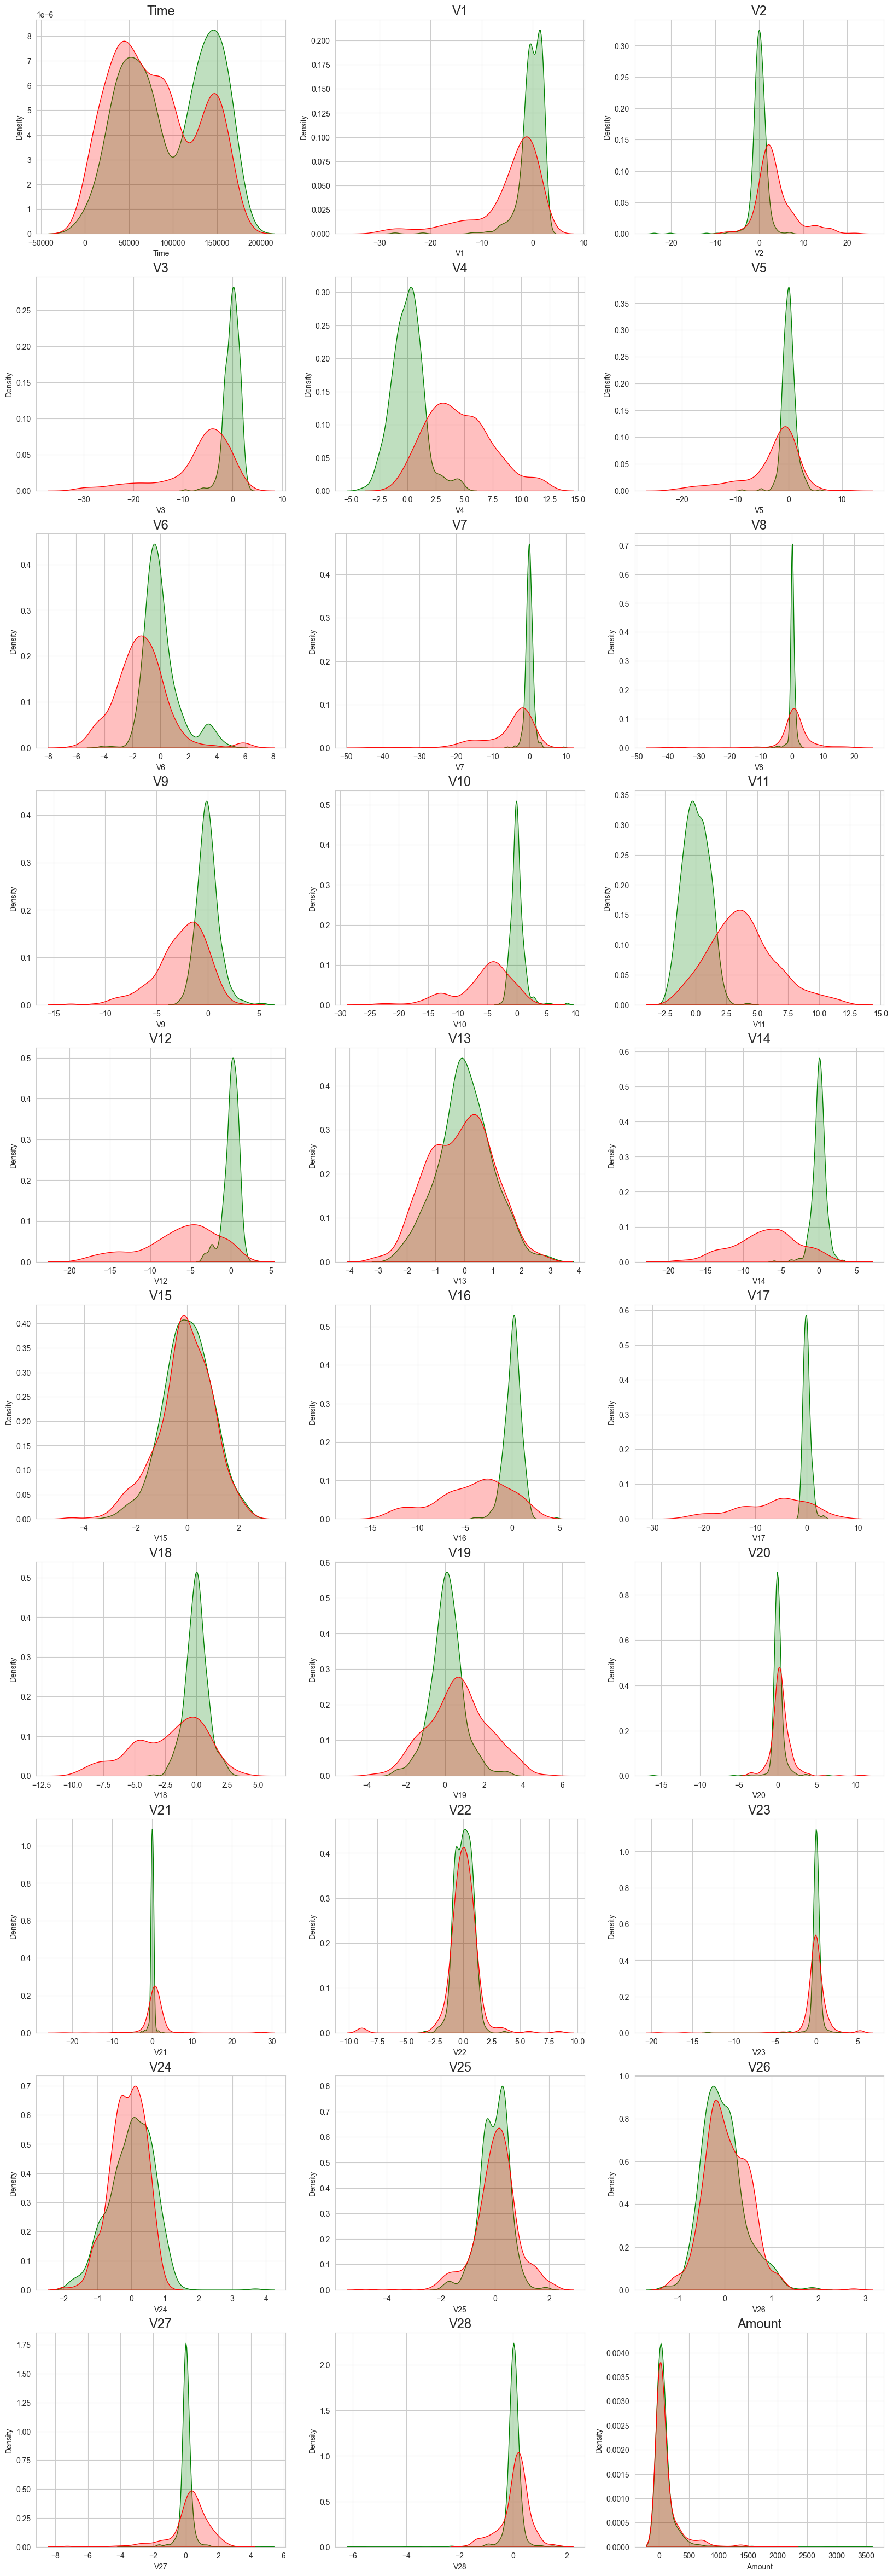

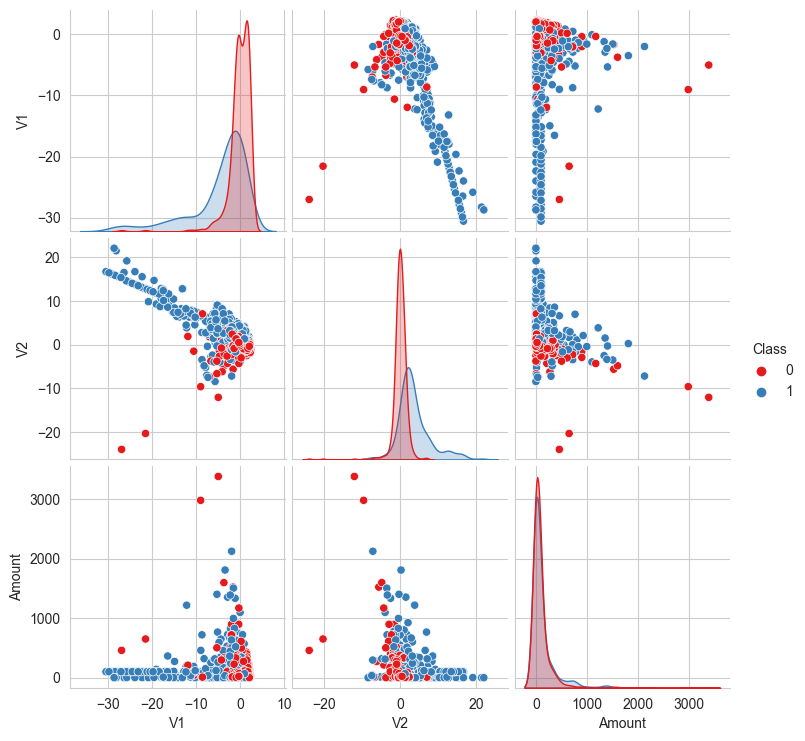

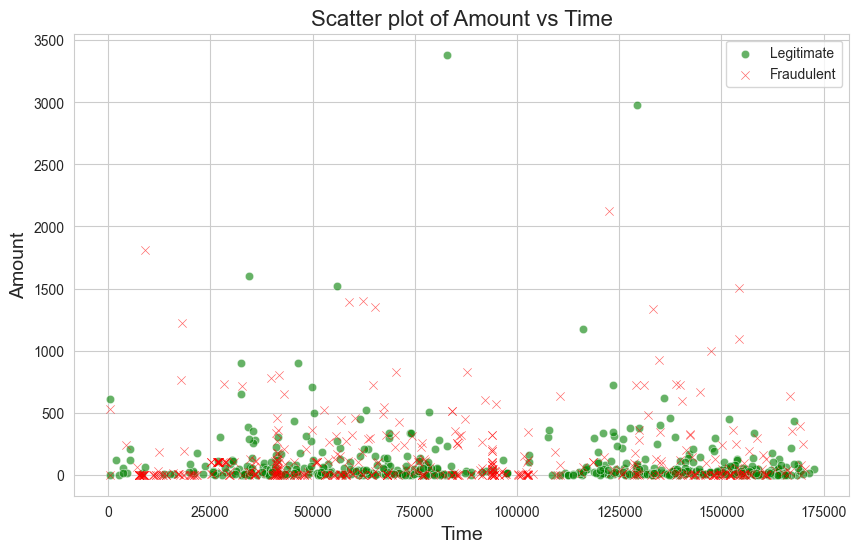

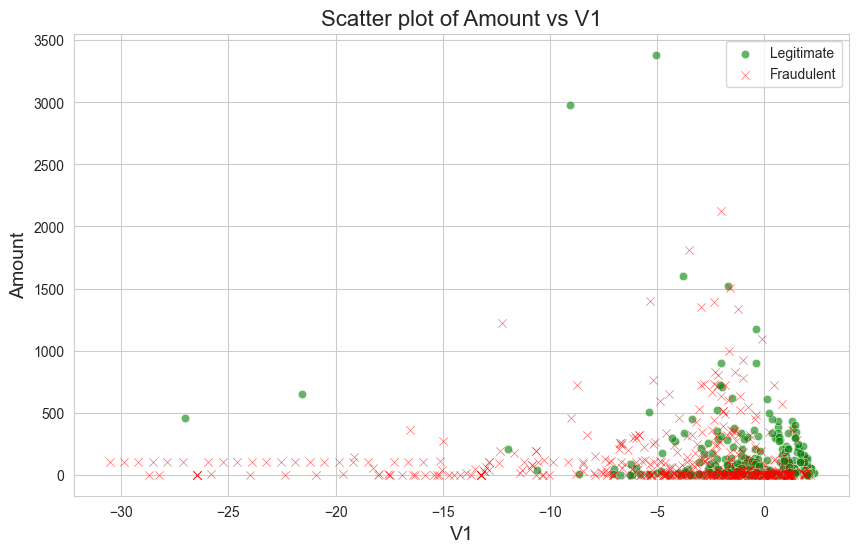

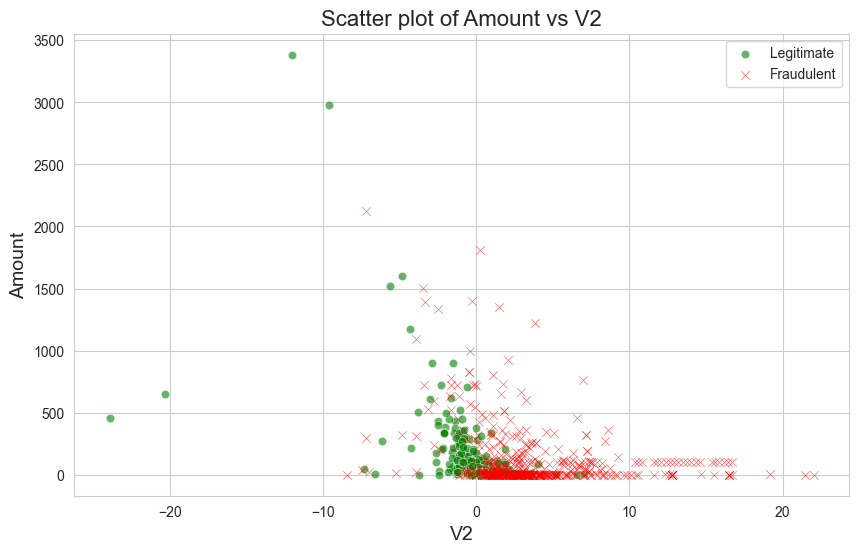

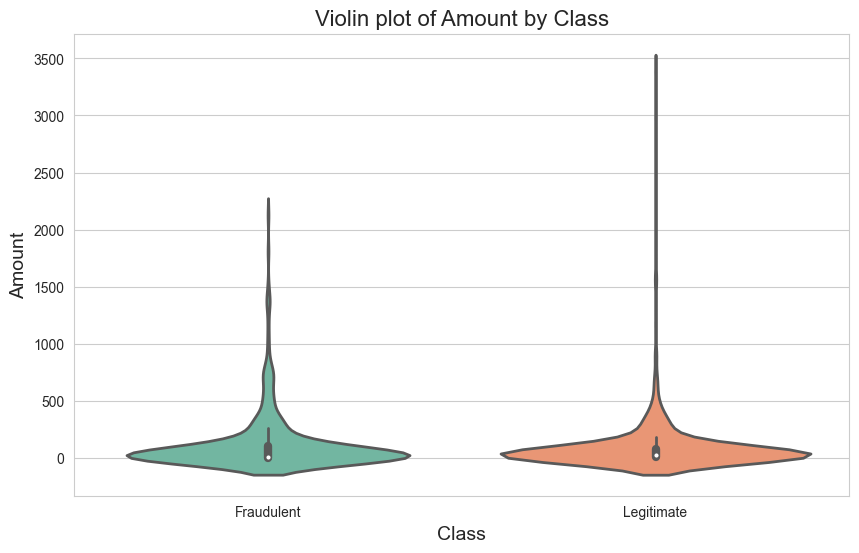

Shape of X: (984, 30)
Shape of y: (984,)
(984, 30) (787, 30) (197, 30)
Accuracy: 0.9543147208121827


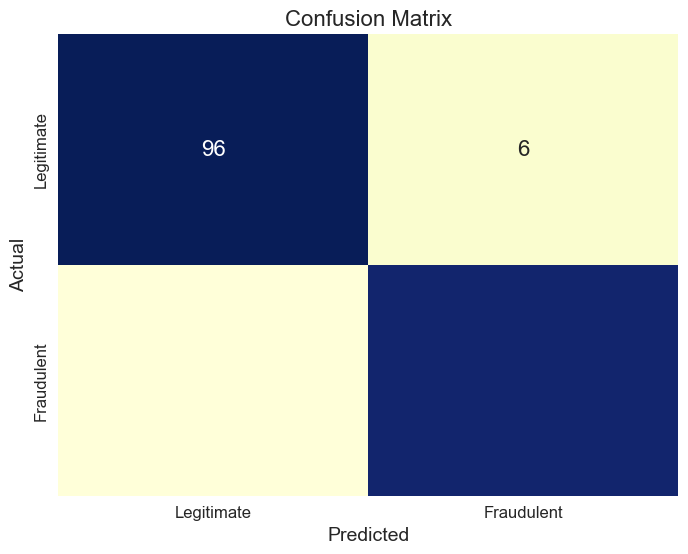

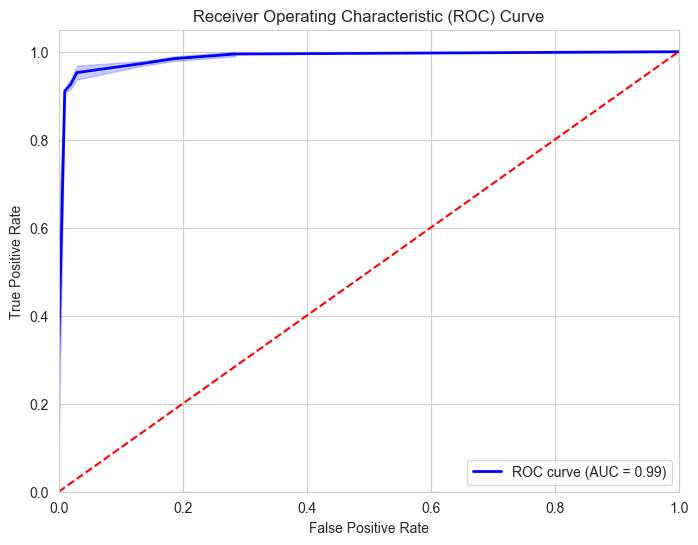

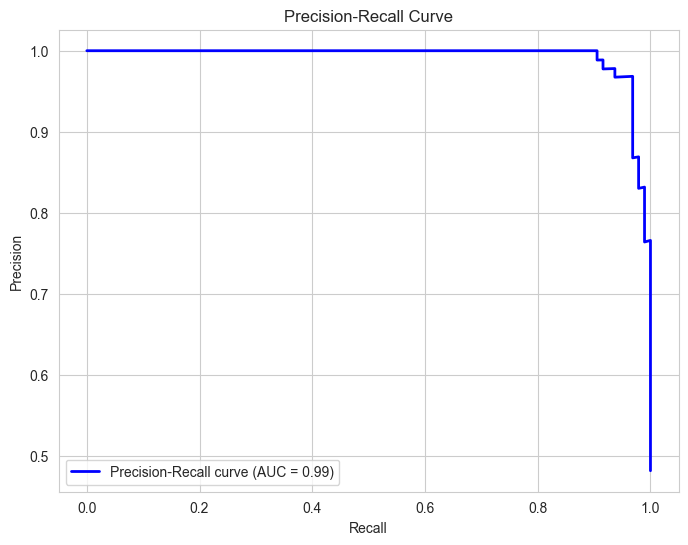

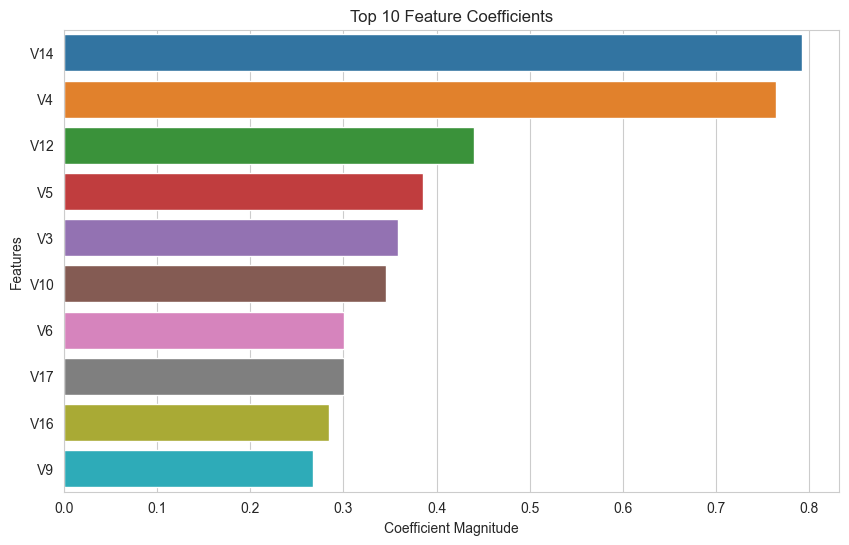

In [31]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from collections import Counter
credit_card_fraud_df = pd.read_csv('credit_card_fraud.csv') 
credit_card_fraud_df.head(100)

from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separating the creadit card transactions into fraudulent and legitimate based on the 'Class' column
fraudulent_transactions_df = credit_card_fraud_df[credit_card_fraud_df['Class'] == 1]
legitimate_transactions_df = credit_card_fraud_df[credit_card_fraud_df['Class'] == 0]

# Checking for the missing values in each column
credit_card_fraud_df.isnull().sum()

# Counting the number of each class
credit_card_fraud_df['Class'].value_counts()

# Displaying the last few records
credit_card_fraud_df.tail()

# Histograms of Transaction Amount by Class
plt.figure(figsize=(12, 6))
sns.histplot(data=credit_card_fraud_df, x='Amount', hue='Class', kde=True, bins=50, palette='Set1')
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

# Printing out the columns in the dataframes and then for each class
print(fraudulent_transactions_df.shape)
print(legitimate_transactions_df.shape)
print(credit_card_fraud_df['Class'].value_counts())

# For fraudulent transactions
print(fraudulent_transactions_df['Amount'].describe())

# For legitimate transactions
print(legitimate_transactions_df['Amount'].describe())

print(fraudulent_transactions_df.head())
print(legitimate_transactions_df.head())

print(fraudulent_transactions_df['Amount'].head())
print(legitimate_transactions_df['Amount'].head())

# Create a correlation matrix
corr_matrix = credit_card_fraud_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# For legitimate transactions
legitimate_stats = legitimate_transactions_df.describe()
print(legitimate_stats)

# For fraudulent transactions
fraudulent_stats = fraudulent_transactions_df.describe()
print(fraudulent_stats)

# For legitimate transactions
legitimate_amt_mean = legitimate_transactions_df['Amount'].mean()
print("Average Legitimate Transaction Amount: ", legitimate_amt_mean)

# For fraudulent transactions
fraudulent_amt_mean = fraudulent_transactions_df['Amount'].mean()
print("Average Fraudulent Transaction Amount: ", fraudulent_amt_mean)

credit_card_fraud_df.groupby('Class').mean()


# Sample legitimate transactions to balance the dataset
legitimate_sample = legitimate_transactions_df.sample(n=492)

# Concatenate fraudulent transactions with the sampled legitimate transactions
balanced_sample_df = pd.concat([legitimate_sample, fraudulent_transactions_df], axis=0)

# Shuffle the dataset to mix the rows
balanced_sample_df = balanced_sample_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the distribution of classes in the balanced dataset
print(balanced_sample_df['Class'].value_counts())

# Group by the 'Class' column and calculate the mean for each group
balanced_sample_df.groupby('Class').mean()

# Separate features (X) and target (y)
X = balanced_sample_df.drop(columns='Class', axis = 1)  
y = balanced_sample_df['Class']                

print(X)
print(y)              

# Filter out the legitimate and fraudulent transactions
fraudulent_transactions_df = credit_card_fraud_df[credit_card_fraud_df['Class'] == 1]
legitimate_transactions_df = credit_card_fraud_df[credit_card_fraud_df['Class'] == 0]

# Filter out the legitimate and fraudulent transactions from X
fraudulent_transactions_X = X[y == 1]
legitimate_transactions_X = X[y == 0]

# Plotting a variable
cols = list(X.columns.values)
plt.figure(figsize=(20,60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.kdeplot(legitimate_transactions_X[col], color = 'green', fill=True)
    sns.kdeplot(fraudulent_transactions_X[col], color = 'red', fill=True)
    plt.title(col, fontsize = 17)
plt.show()


# Select a subset of columns for the scatter plot matrix
selected_columns = ['V1', 'V2', 'Amount'] 
selected_data = X[selected_columns]

# Add the 'Class' column to color the points by class
selected_data['Class'] = y

# Create a scatter plot matrix
sns.pairplot(selected_data, hue='Class', palette='Set1')
plt.show()


# Scatter plot of 'Amount' against 'Time' for both legitimate and fraudulent transactions
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x=legitimate_transactions_X['Time'], y=legitimate_transactions_X['Amount'], color='green', label='Legitimate', marker='o', alpha=0.6)
sns.scatterplot(x=fraudulent_transactions_X['Time'], y=fraudulent_transactions_X['Amount'], color='red', label='Fraudulent', marker='x', alpha=0.6)
plt.title('Scatter plot of Amount vs Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.legend()
plt.show()

# Scatter plot of Amount vs V1
plt.figure(figsize=(10, 6))
sns.scatterplot(x=legitimate_transactions_X['V1'], y=legitimate_transactions_X['Amount'], color='green', label='Legitimate', marker='o', alpha=0.6)
sns.scatterplot(x=fraudulent_transactions_X['V1'], y=fraudulent_transactions_X['Amount'], color='red', label='Fraudulent', marker='x', alpha=0.6)
plt.title('Scatter plot of Amount vs V1', fontsize=16)
plt.xlabel('V1', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.legend()
plt.show()


# Scatter plot of Amount vs V2
plt.figure(figsize=(10, 6))
sns.scatterplot(x=legitimate_transactions_X['V2'], y=legitimate_transactions_X['Amount'], color='green', label='Legitimate', marker='o', alpha=0.6)
sns.scatterplot(x=fraudulent_transactions_X['V2'], y=fraudulent_transactions_X['Amount'], color='red', label='Fraudulent', marker='x', alpha=0.6)
plt.title('Scatter plot of Amount vs V2', fontsize=16)
plt.xlabel('V2', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.legend()
plt.show()

# Violin plot comparing the distribution of transaction amounts for each class
plot_df = X.copy()
plot_df['Class'] = y.replace({0: 'Legitimate', 1: 'Fraudulent'})

plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Amount', data=plot_df, palette='Set2', linewidth=2, width=0.8)
plt.title('Violin plot of Amount by Class', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.show()

# Print the shapes of X and y to verify the split
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

# Initialize, train, predict labels and calculate accuracy of the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

X_test_pred = logistic_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, y_test)


# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False, annot_kws={"size": 16})

plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
class_names = ['Legitimate', 'Fraudulent']  # replace with your class names
plt.xticks(ticks=[0.5, 1.5], labels=class_names, fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=class_names, fontsize=12)

plt.show()


# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(x=fpr, y=tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc, ax=ax)
ax.plot([0, 1], [0, 1], color='red', linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc="lower right")

plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Extract, sort, and plot the top 10 feature coefficients from the logistic regression model
logistic_model_coef = logistic_model.coef_[0]
abs_logistic_model_coef = np.abs(logistic_model_coef)
sorted_idx = np.argsort(abs_logistic_model_coef)[::-1]
top_features = X.columns[sorted_idx][:10]

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=abs_logistic_model_coef[sorted_idx][:10], y=top_features, ax=ax)
ax.set_title("Top 10 Feature Coefficients")
ax.set_xlabel('Coefficient Magnitude')
ax.set_ylabel('Features')
plt.show()
